# Assignment 3 - Task 3

Group: David, Christian

## Approach/general idea

### 3.1

Define/describe a way to calculate or describe how diverse a number of the original explanations are as a set. Base diversity on demographics of the original dataset: gender, profession, age, ...

### 3.2

Report on maximum readability and semantic similarity of consolidated explanations. Base this on task 2 or generate explanations based on arbitrary (?) sets of original explanations to see what the max can be.

### 3.3

Disregard readability. We should know the maximum semantic similarity we achieved for 3.2.
Now we choose sets of original explanations in such a way, that the diversity is maximized, and consolidate explanations and hope they reach our max semantic similarity. Report how diverse the set can be while still being at max semantic similarity.

## Task 3

To determione diversity we calculate the Shannon entropy of select columns of the original dataset. Relevant columns are `Worker.profession`, `Worker.yearsOfExperience`, `Worker.age`, and `Worker.gender`. To reduce variance in continuous columns, we bucketize `Worker.yearsOfExperience` and `Worker.age`.

To calculate the combined diversity score we calculate the entropy of each relevant column of the subset and sum the 4 values. To maximize diversity we are therefore looking for the largest combined value.

In [393]:
import scipy
import pandas as pd
import textstat
import bleurt
from bleurt import score
from scipy.stats import entropy

import requests
import json
import tqdm
import sklearn

import matplotlib.pyplot as plt

2025-02-10 18:15:19.503884: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-10 18:15:21.684579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739207722.499633   27921 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739207722.752432   27921 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 18:15:25.054581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [396]:
def calculateFleschReadingEase(candidate) -> float:
    return textstat.flesch_reading_ease(candidate)

# Calculates BLEURT score of candidate compared to reference
# Requires the BLEURT-20 checkpoint to run
def calculateBleurtScore(references, candidates) -> list:
    scorer = bleurt.score.LengthBatchingBleurtScorer(checkpoint='BLEURT-20')
    bleurt_scores = scorer.score(references=references, candidates=candidates)
    return bleurt_scores

In [397]:
df = pd.read_csv('answerList_data.csv')

explanations_df = df[(df['FailingMethod'] == 'HIT01_8') & (df['TP'] == 1)]
ground_truth = 'The specification states, that the method "DateTimeZone()" accepts a minutes offset value in the range of -59 to 59 inlcusive. The method checks if this value, stored as "minutesOffset", is within these bounds on line 279, but incorrectly throws an "IllegalArgumentException" for any minutes offset less than zero instead of less than -59. To fix the issue and satisfy the specification, the conditional on line 279 should check for "minutesOffset < -59" instead.'

In [414]:
def calculate_diversity(entries):
    return entropy(entries.value_counts(normalize=True))

def bucketize(number, step):
    return round(number / step) * step

explanations_df['Worker.age_bucket'] = bucketize(df['Worker.age'], 10)
explanations_df['Worker.yearsOfExperience_bucket'] = bucketize(df['Worker.yearsOfExperience'], 5)

relevant_columns = ['Worker.profession', 'Worker.yearsOfExperience_bucket', 'Worker.age_bucket', 'Worker.gender']
explanations_reference_diversity = {col: calculate_diversity(explanations_df[col]) for col in relevant_columns}

/tmp/ipykernel_27921/2363039779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explanations_df['Worker.age_bucket'] = bucketize(df['Worker.age'], 10)
/tmp/ipykernel_27921/2363039779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explanations_df['Worker.yearsOfExperience_bucket'] = bucketize(df['Worker.yearsOfExperience'], 5)


### Maximum readability and similarity

As for Task 2, we measure readability with the Flesch reading ease score, and similarity using the BLEURT score.

We have already calculated both readability and similarity (BLEURT) scores of consolidated explanations during Task 2. The highest BLEURT and readability scores were `0.515562` and `72.66`, respectively.

### Maximizing similarity with max diversity

To determine the diversity of explanations that, when consolidated, produce an explanation with a similarly high BLEURT score, we proceed like in Task 2 by first calculating the similarity score of the original explanations compared to our ground truth. We then sort the original explanations by similarity score and start consolidating answers, while calculating the diversity of the combined explanations.

In [415]:
explanation_bleurt = calculateBleurtScore([ground_truth] * len(explanations_df), explanations_df['Answer.explanation'].to_list())
explanations_df['bleurt'] = explanation_bleurt

INFO:tensorflow:Reading checkpoint BLEURT-20.


INFO:tensorflow:Reading checkpoint BLEURT-20.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Will load model: BLEURT-20/sent_piece.model.


INFO:tensorflow:Will load model: BLEURT-20/sent_piece.model.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:Average batch sequence length: 194.5


INFO:tensorflow:Average batch sequence length: 194.5
/tmp/ipykernel_27921/1497583290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explanations_df['bleurt'] = explanation_bleurt


As for Task 2 we use a locally running instance of `Ollama` to prompt `deepseek-llm` to consolidate the original explanations.

In [405]:
# API provided by running llm using Ollama locally
url = "http://localhost:11434/api/generate"
headers = {
    "Content-Type": "application/json"
}
model_deepseek_llm = "deepseek-llm:7b"
model_llama = "llama3.2:3b"
schema = {
    "$schema": "ase-schema",
    "title": "Explanation",
    "description": "A failure explanation",
    "type": "object",
    "properties": {
        "explanation": {
            "description": "The generated explanation",
            "type": "string"
        }
    },
    "required": ["explanation"]
}
data_json = {
    "model": model_deepseek_llm,
    "prompt": "",
    "stream": False,
    "format": schema
}

explanations_df = df[(df['FailingMethod'] == 'HIT01_8') & (df['TP'] == 1)]
ground_truth = 'The specification states, that the method "DateTimeZone()" accepts a minutes offset value in the range of -59 to 59 inlcusive. The method checks if this value, stored as "minutesOffset", is within these bounds on line 279, but incorrectly throws an "IllegalArgumentException" for any minutes offset less than zero instead of less than -59. To fix the issue and satisfy the specification, the conditional on line 279 should check for "minutesOffset < -59" instead.'

prompt_task = "###Task:\nYou are a professional software developer. You are given a number of explanations describing the root of cause and possible fix to a software failure. Based on the given explanations, write a single explanation that contains all the information required to understand and fix the bug. The explanation should be succinct and without redundant information"

prompt_input = "### Input:\n\nHere are the failure explanations:\n\n"

prompt_output = "### Output:\nFormat your response in valid JSON format with a single field 'explanation' of type string containing your generated explanation."

In [408]:
def generate_explanations(expl_df, url, header, data, prompt_task, prompt_input, prompt_output=''):
    responses = []

    for i in tqdm.tqdm(range(1, len(expl_df))):
        slice = expl_df[0:i]
        input = ''.join("'''\n" + expl + "\n'''\n\n" for expl in slice['Answer.explanation'].to_list())
        slice_diversity = sum([calculate_diversity(slice[col]) for col in relevant_columns])
        prompt = prompt_task + prompt_input + input + prompt_output
        data['prompt'] = prompt
        response = requests.post(url, headers=headers, data=json.dumps(data))
        if (response.status_code == 200):
            responses.append({'prompt': prompt, 'result': json.loads(response.text)['response'], 'diversity': slice_diversity})
    return responses

In [416]:
responses_json = generate_explanations(explanations_df.sort_values(by=['bleurt'], ascending=False), url, headers, data_json, prompt_task, prompt_input, prompt_output)

100%|██████████| 30/30 [05:54<00:00, 11.82s/it]


In [417]:
generated_explanations = [json.loads(r['result'])['explanation'] for r in responses_json]
generated_explanations_bleurt = calculateBleurtScore([ground_truth] * len(generated_explanations), generated_explanations)
df_data = {
    'generated_explanation': generated_explanations,
    'bleurt': generated_explanations_bleurt,
    'diversity': [r['diversity'] for r in responses_json]
}
generated_explanations_df = pd.DataFrame(df_data)

INFO:tensorflow:Reading checkpoint BLEURT-20.


INFO:tensorflow:Reading checkpoint BLEURT-20.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Will load model: BLEURT-20/sent_piece.model.


INFO:tensorflow:Will load model: BLEURT-20/sent_piece.model.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:Average batch sequence length: 192.5


INFO:tensorflow:Average batch sequence length: 192.5


array([<Axes: >, <Axes: >], dtype=object)

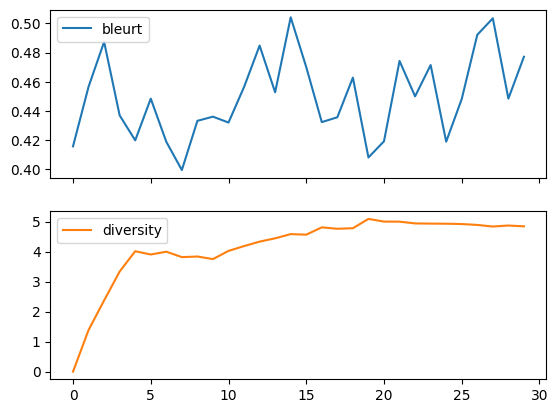

In [418]:
generated_explanations_df.plot(subplots=True)

In [421]:
generated_explanations_df.sort_values(by=['bleurt', 'diversity'], ascending=False)

,generated_explanation,bleurt,diversity
14,The issue occurs on line 279 due to the condit...,0.504215,4.580003
27,"The issue lies on line 279, where the conditio...",0.503526,4.833083
26,The error is occurring on line 279 due to the ...,0.492197,4.886238
2,The error occurs on line 279 due to an incorre...,0.487354,2.371641
12,"The issue lies on line 279, where the variable...",0.484784,4.329704
29,The issue occurs on line 279 due to the condit...,0.477121,4.839115
21,The issue occurs on line 279 due to the condit...,0.474249,4.994951
23,"The issue lies on line 279, where it incorrect...",0.471431,4.930282
15,The issue lies on line 279 where the condition...,0.470020,4.561635
18,The error occurs on line 279 due to the variab...,0.462780,4.776839


As we can see, by sorting the generated explanations by BLEURT score, the highest similarity to our ground truth is `0.504215`. This value lies relatively close to our previously observes maximum of `0.515562` from Task 2. The corresponding diversity score for this explanation lies at `4.580003`, with the maximum diversity score being `5.086470`. The explanation with the maximum diversity score has, however, a comparatively low similarity score. The explanations where both scores are high in combination are 26 and 27.